# 主成分分析（PCA)

In [1]:
import pandas as pd
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_test_std.shape

(54, 13)

In [3]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
print(cov_mat)

[[ 1.00813008  0.06709556  0.17405351 -0.35439069  0.26374703  0.29079481
   0.21835807 -0.08111974  0.10436705  0.54282846  0.05893536 -0.01797029
   0.6415292 ]
 [ 0.06709556  1.00813008  0.08326463  0.26356776 -0.11349172 -0.33735555
  -0.41035281  0.33653916 -0.21602672  0.17504154 -0.551593   -0.40561695
  -0.24089991]
 [ 0.17405351  0.08326463  1.00813008  0.46420355  0.29092834  0.18020384
   0.15537535  0.15918823 -0.00703776  0.20549146  0.00665422  0.02039019
   0.223495  ]
 [-0.35439069  0.26356776  0.46420355  1.00813008 -0.07406447 -0.28060672
  -0.31391899  0.31581353 -0.24621059 -0.08872685 -0.22595587 -0.16799906
  -0.46393412]
 [ 0.26374703 -0.11349172  0.29092834 -0.07406447  1.00813008  0.25667578
   0.21025773 -0.26003426  0.19601657  0.20606456  0.13359768  0.06633258
   0.41810999]
 [ 0.29079481 -0.33735555  0.18020384 -0.28060672  0.25667578  1.00813008
   0.87123661 -0.44979792  0.62334099 -0.05689854  0.50664086  0.71978745
   0.52986924]
 [ 0.21835807 -0.41035

In [4]:
# 行列の固有値・固有ベクトルを求める（=固有値分解 or 固有分解 or eigendecomposition）
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues\n', eigen_vals)

Eigenvalues
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [5]:
print(type(eigen_vals))
print(type(eigen_vecs))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
sorted(eigen_vals, reverse=True)

[4.842745315655898,
 2.4160245870352255,
 1.5484582488203513,
 0.9612043774977367,
 0.8416616104578422,
 0.6620634040383039,
 0.5182847213561953,
 0.34650376641286657,
 0.3131368004720887,
 0.2135721466052733,
 0.18086130479496634,
 0.15362835006711043,
 0.10754642369670996]

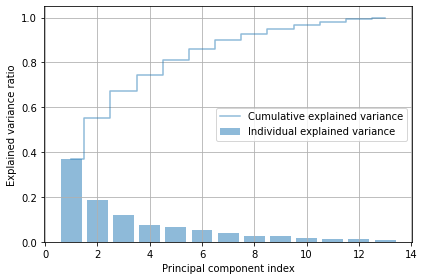

In [7]:
tot = sum(eigen_vals)
var_exp = [ (i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,14), cum_var_exp, alpha=0.5, where='mid', label='Cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')

plt.legend(loc='best')
plt.tight_layout()
plt.grid()
plt.show()

In [8]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k:k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print(w)

[[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


以上までで、共分散行列を固有分解して、固有値の大きさ上位2つに相当する固有ベクトルを持ってこれたことになっている。$W$ 行列は13×2行列で、縦ベクトルが2つ繋がったものとして見る（1つ目が固有値が最大の固有ベクトル、2つ目が2番目に大きい固有値の固有ベクトル）。

In [9]:
X_train_pca = X_train_std.dot(w)
X_train_pca.shape

(124, 2)

In [10]:
np.unique(y_train)
y_train

array([3, 1, 1, 1, 3, 2, 2, 3, 2, 2, 2, 1, 2, 3, 1, 3, 2, 1, 3, 3, 2, 1,
       2, 2, 2, 2, 3, 1, 2, 2, 1, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 3, 3, 3,
       1, 2, 3, 3, 2, 3, 2, 2, 2, 1, 2, 2, 3, 3, 2, 1, 1, 2, 3, 3, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 3, 2, 2, 3, 1, 2, 1, 2, 2, 3, 2,
       1, 1, 1, 3, 2, 1, 1, 2, 2, 3, 3, 2, 1, 1, 2, 2, 3, 1, 3, 1, 2, 2,
       2, 2, 1, 3, 1, 1, 1, 1, 2, 2, 3, 3, 2, 2])

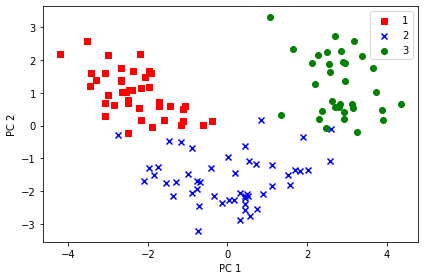

In [11]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### scikit-learnを用いたPCA

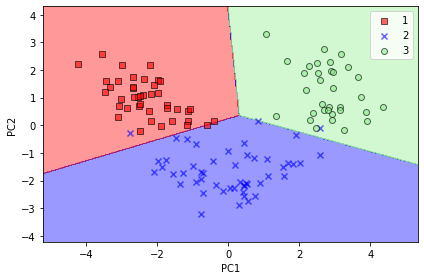

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from script.plot_decision_regions_script import plot_decision_regions

pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

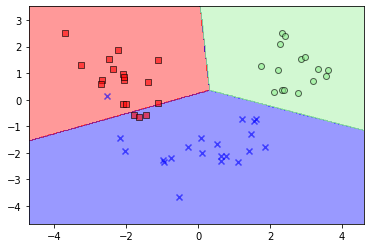

In [14]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.show()

In [21]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

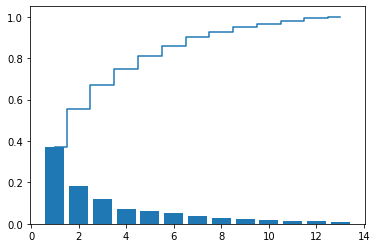

In [22]:
plt.bar(range(1,14), pca.explained_variance_ratio_, align='center')
plt.step(range(1,14), np.cumsum(pca.explained_variance_ratio_), where='mid')

## 線形判別分析

In [25]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))

In [29]:
    
d = 13
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        row, mv = row.reshape(d,1), mv.reshape(d,1)
        class_scatter += (row-mv).dot((row-mv).T)
        
    S_W += class_scatter
    
print(np.bincount(y_train[1:]))

[ 0 41 50 32]
